# **Turma de Pós-Graduação de Ciência de Dados**

**Disciplina: Linguagem de Programação Python**

**prof: Sérgio Assunção Monteiro, DSc**

# **Aula 07**

# **Visualização de Dados**

Referências:

> [1] https://plotly.com/python/plotly-express/

> [2] https://en.wikipedia.org/wiki/Hans_Rosling


In [1]:
import plotly.express as px
gapminder_df = px.data.gapminder()

In [2]:
gapminder_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [3]:
df = px.data.gapminder().query("year==2007")

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [5]:
px.strip(df, x = "lifeExp", color="continent", hover_name="country")

In [6]:
px.histogram(df, x = "lifeExp", color="continent", hover_name="country")

In [7]:
px.histogram(df, x = "lifeExp", y="pop", color="continent", hover_name="country", marginal="rug")

In [8]:
px.histogram(df, x = "lifeExp", y="pop", color="continent", hover_name="country", marginal="rug", facet_col="continent")

In [9]:
px.choropleth(df, color="lifeExp", locations = "iso_alpha", hover_name="country", height=500)

In [10]:
px.scatter(data_frame=gapminder_df,
           x='gdpPercap',
           y='lifeExp',
           size='pop',
           color='continent',
           title='Life Span and Wealth 1952 - 2007',
           labels={'gdpPercap':'Wealth',
                  'lifeExp':'Life Span'},
           log_x=True,
           range_y=[25,95],
           hover_name='country',
           animation_frame='year',
           height=600,
           size_max=100)

# **Storytelling para Finanças**

In [11]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 63 kB 52.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
import pandas as pd

In [13]:
import yfinance as yf #Instalando e importando a API no código

In [14]:
codigo = ['ABUD34.SA']
df = yf.download(codigo[0], 
                 start='2021-09-01', 
                 end='2021-11-01',
                 group_by="ticker"); # ";" serve para não exibir os dados

[*********************100%***********************]  1 of 1 completed


In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,53.410000,53.410000,53.410000,53.410000,53.410000,3
2021-09-02,52.599998,52.700001,51.950001,52.139999,52.139999,1004
2021-09-03,51.700001,51.750000,51.200001,51.700001,51.700001,2637
2021-09-06,52.150002,52.150002,52.099998,52.099998,52.099998,56
2021-09-08,51.900002,51.900002,51.900002,51.900002,51.900002,5501


**Dicionário das variáveis:**

*   Date – dia.
*   Open – O valor de abertura da ação no dia.
*   High – Valor máximo que a ação chegou no dia.
*   Low – O valor mínimo da ação no dia.
*   Close – Preço de fechamento no dia.
*   Adj Close – Preço de fechamento do dia ajustado.
*   Volume – Volume negociado no dia.






In [16]:
df['Close'].describe()

count    41.000000
mean     51.798293
std       1.621138
min      50.049999
25%      50.650002
50%      51.599998
75%      52.139999
max      57.480000
Name: Close, dtype: float64

In [17]:
import seaborn as sns
sns.set_theme(style="darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



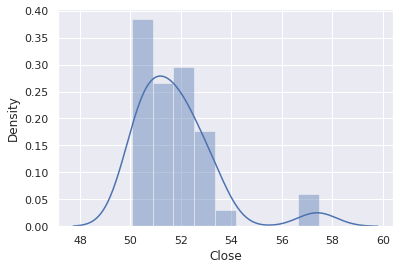

In [18]:
sns.distplot(df['Close'].dropna())

In [19]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [20]:
import plotly.offline as py

In [21]:
import plotly.graph_objs as go
dados = [go.Scatter(x=df.index, y=df['Close'])]
py.iplot(dados)

In [22]:
# Média simples de 3 dias
df['MM_3'] = df.Close.rolling(window=3).mean()

# Média simples de 9 dias
df['MM_9'] = df.Close.rolling(window=9).mean()

# Média simples de 15 dias
df['MM_15'] = df.Close.rolling(window=15).mean()

fechamento = go.Scatter(x=df.index,
                   y=df.Close,
                   name = "ABUD34 Close",
                   line = dict(color = '#330000'),
                   opacity = 0.8)

MM_3 = go.Scatter(x=df.index,
                  y=df['MM_3'],
                  name = "Média Móvel 3 Períodos",
                  line = dict(color = '#FF8000'),
                  opacity = 0.8)

MM_9 = go.Scatter(x=df.index,
                  y=df['MM_9'],
                  name = "Média Móvel 9 Períodos",
                  line = dict(color = '#B2FF66'),
                  opacity = 0.8)

MM_15 = go.Scatter(x=df.index,
                   y=df['MM_15'],
                   name = "Média Móvel 15 Períodos",
                   line = dict(color = '#FF00FF'),
                   opacity = 0.8)

data = [fechamento, MM_3, MM_9, MM_15]

py.iplot(data)

In [23]:
# D Média simples de 3 dias
df['DMM_3'] = df.Close.rolling(window=3).std()
DMM_3 = go.Scatter(x=df.index,
                  y=df['DMM_3'],
                  name = "D Média Móvel 3 Períodos",
                  line = dict(color = '#FF8000'),
                  opacity = 0.8)
data2 = [DMM_3]

py.iplot(data2)